This Jupyter notebook focus on evaluation of models

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import warnings 
warnings.filterwarnings('ignore')

In [3]:
data = ('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv')
df = pd.read_csv(data)
df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)

df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [4]:
# First lets only use numeric data
df._get_numeric_data()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,1,122,94.5,0.822681,0.909722,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,2,164,99.8,0.848630,0.919444,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,2,164,99.4,0.848630,0.922222,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,109.1,0.907256,0.956944,55.5,2952,141,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0,10.217391,0,1
197,-1,95,109.1,0.907256,0.955556,55.5,3049,141,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0,12.368421,0,1
198,-1,95,109.1,0.907256,0.956944,55.5,3012,173,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0,13.055556,0,1
199,-1,95,109.1,0.907256,0.956944,55.5,3217,145,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0,9.038462,1,0


In [5]:
# libraries for plotting
from ipywidgets import interact, interactive, fixed, interact_manual
# functions for plotting
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    ax1 = sns.kdeplot(RedFunction, color="r", label=RedName)
    ax2 = sns.kdeplot(BlueFunction, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')
    plt.show()
    plt.close()
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()    

##### PART ONE TRAINNING AND TESTING  
An important step in testing your model is to split your data into training and testing data. We will replace target data price in separate dataframe y_data.


In [6]:
y_data = df['price']

In [7]:
x_data = df.drop('price',axis=1)


In [8]:
#now we randomly split our data into trainning and testing data using function train_test_split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data,test_size=0.10,random_state =1)
print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 21
number of training samples: 180


In [9]:
#Use the function "train_test_split" to split up the dataset such that 40% of the data samples will be utilized for testing. 
#Set the parameter "random_state" equal to zero. The output of the function should be the following: 
#"x_train1" , "x_test1", "y_train1" and  "y_test1".
x_train1,x_test1,y_train1,y_test1= train_test_split(x_data,y_data,test_size=0.40, random_state=0)
print("number of test samples :", x_test1.shape[0])
print("number of training samples:",x_train1.shape[0])


number of test samples : 81
number of training samples: 120


In [10]:
from sklearn.linear_model import LinearRegression
lre = LinearRegression()

In [11]:
# we fit the model using horsepower
lre.fit(x_train[['horsepower']], y_train)

LinearRegression()

In [12]:
# Lets calculate R2 on test data 
lre.score(x_test[['horsepower']], y_test)

0.36358755750788263

In [13]:
lre.score(x_train[['horsepower']], y_train)

0.6619724197515104

In [14]:
# FInd the R2 on test data using 40 percent of data for testing
lre1 = LinearRegression()
lre1.fit(x_train1[['horsepower']],y_train1)
lre1.score(x_test1[['horsepower']],y_test1)

0.7139364665406973

In [15]:
# Sometimes we donot have sufficient testing data, as a result we may want to perform cross-validation. Lets go over several methods that you can use 
# CROSS VALIDATION  for
from sklearn.model_selection import cross_val_score
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [16]:
#calculating average and std devian of our estimate
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.522009915042119 and the standard deviation is 0.2911839444756029


In [17]:
-1 * cross_val_score(lre,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error')

array([20254142.84026702, 43745493.2650517 , 12539630.34014931,
       17561927.7224759 ])

In [18]:
#Calculate the average R^2 using two folds, then find the average R^2 for the second fold utilizing the "horsepower" feature
Rcross1 = cross_val_score(lre, x_data[['horsepower']], y_data, cv=2)
Rcross1

array([0.59015621, 0.44319613])

In [19]:
Rcross1.mean()


0.5166761697127429

In [20]:
# We can also use the function cross validation predict to predict the output. The function splits up the data into specifed number of folds
# with one fold for testing and other folds for training.
from sklearn.model_selection import cross_val_predict
yhat = cross_val_predict(lre,x_data[['horsepower']], y_data,cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

##### OVERFITTING, UNDERFITTING AND MODEL SELECTION
It turn out that test data also known as "out of sample data", is a much better measure of how well your model performs in the real world. One reason is overfitting.  
Lets go over some examples. It turns out these differances are more apparent in MLR and PLR models so we are going to explore overfitting in that context

In [22]:
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression()

In [23]:
# prediction using training data
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

In [24]:
#prediction using test data
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

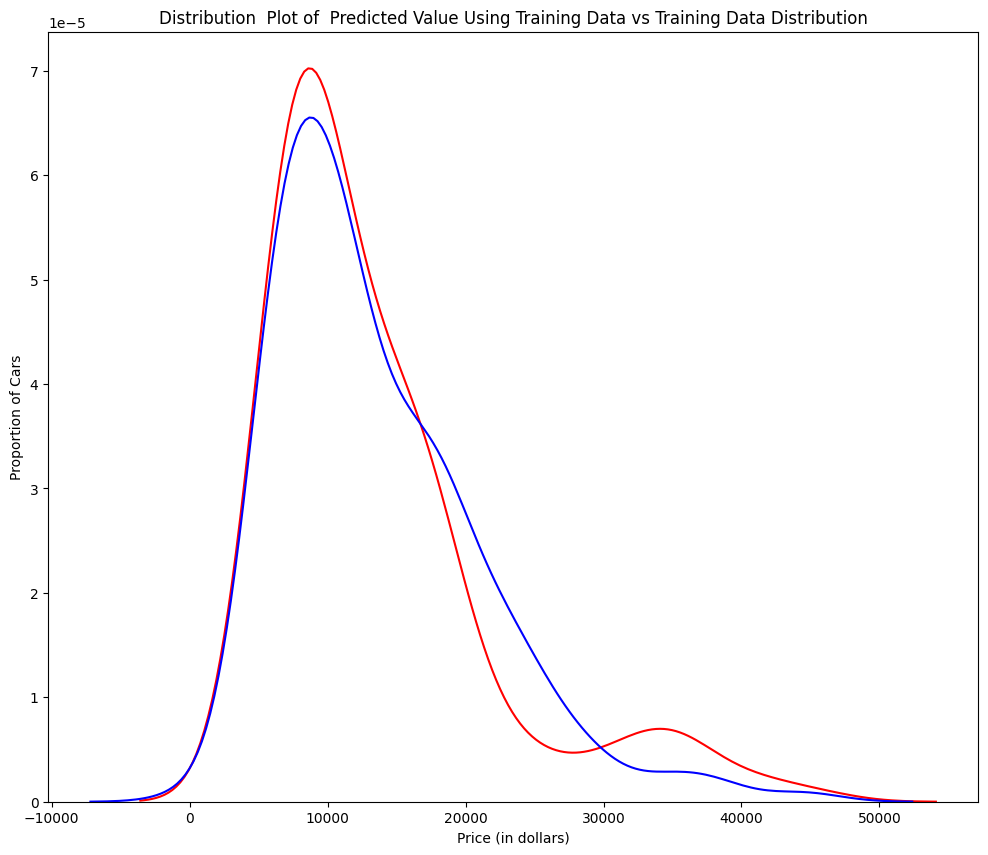

In [30]:
# Lets perform some model evaluation using our training and testing data separately.

# First lets explore distribution of predicted values of training data
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)
# Below is the plot of predicted values of training data versus actual value of training data

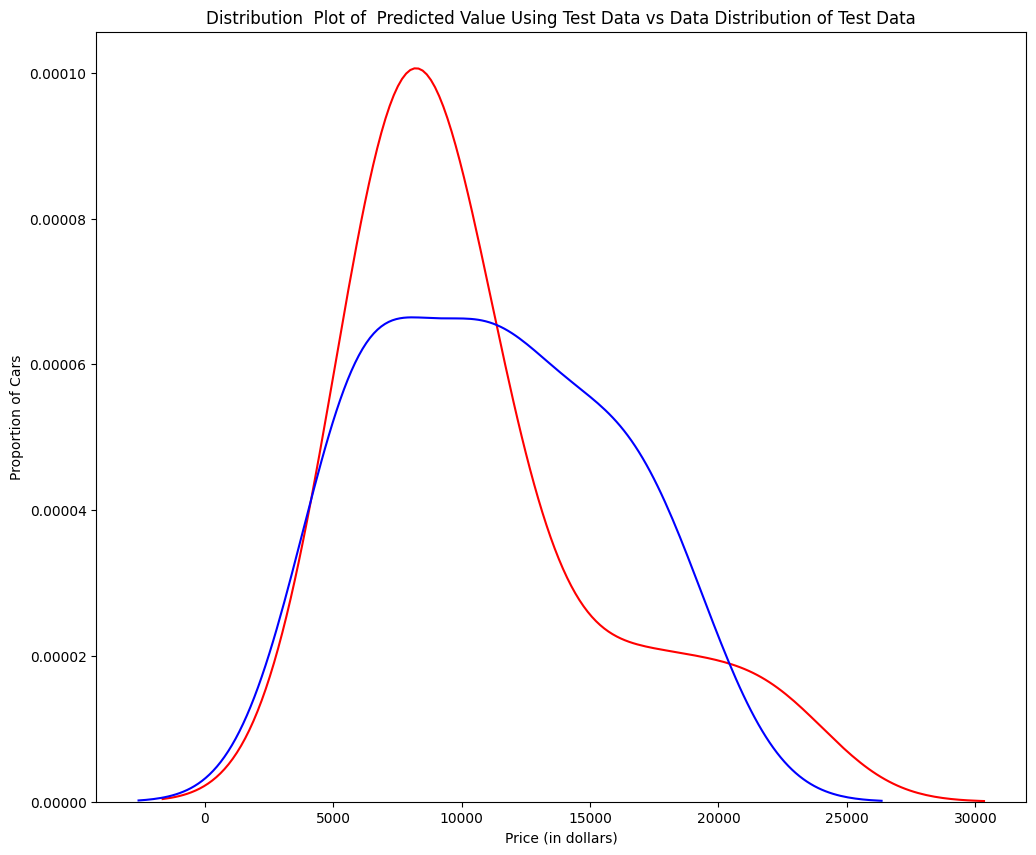

In [31]:
#So far the model is doing well in learning from the training dataset. But what happens when the model encounters new data from testing dataset.
#When the model generates new data from test data, we see the distribution of predicted values is much different from actual target values
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

Lets see if polynomial regression also exhibits a drop in the prediction accuracy when analysing the test data  
OVERFITTING  
Overfitting occurs when the model fits the noise instead of the underlying process. Therefore, while testing the model using test data, your model does not perform well since it is the modelling noise, not the underlying process that generated the relationship.  
Lets create a 5 degree polynomial model


In [35]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)
# We will create a 5 degree polynomial transformation on feature 'horsepower'
from sklearn.preprocessing import PolynomialFeatures
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

In [36]:
# Lets create LinearRegression model 'poly' and train it
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

In [37]:
# We can see the output of the model using method predict. We assign the values to y_hat
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6728.67965875,  7308.0119838 , 12213.80910478, 18893.1997037 ,
       19995.89349921])

In [38]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 6728.67965875  7308.0119838  12213.80910478 18893.1997037 ]
True values: [ 6295. 10698. 13860. 13499.]


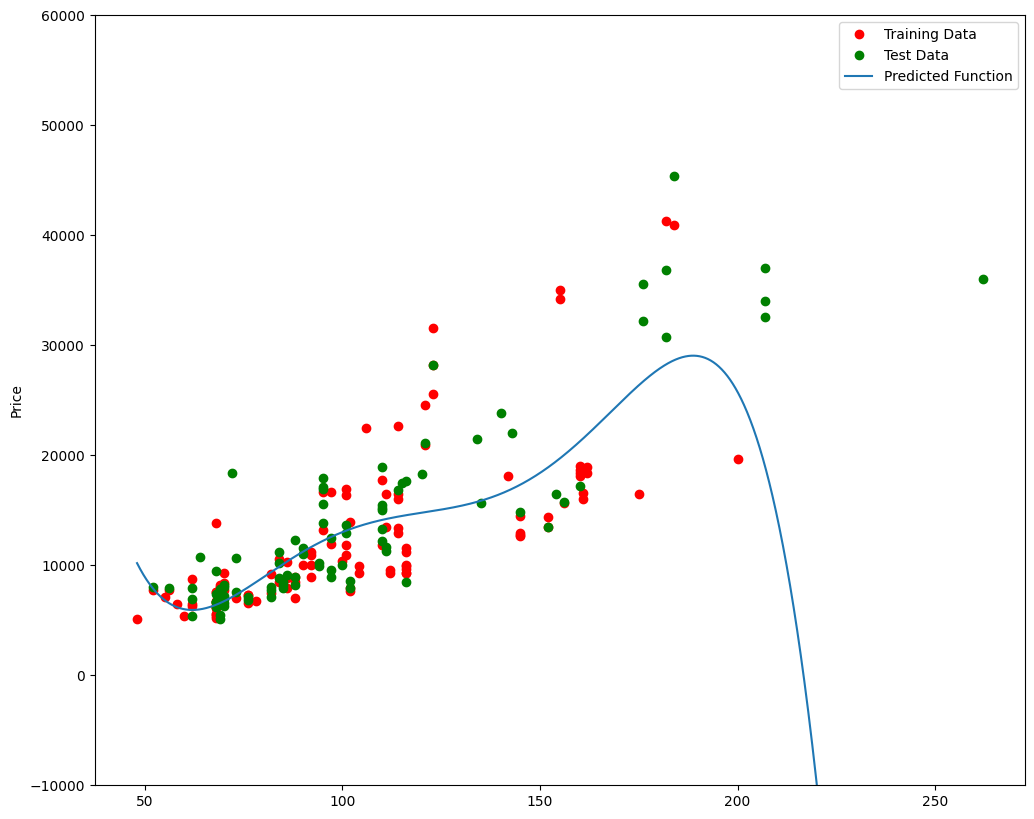

In [42]:
# We will use the function PollyPlot to display training data, testing data, and the predicted function
PollyPlot(x_train['horsepower'], x_test['horsepower'], y_train, y_test, poly,pr)
# Here we see that estimated function appears to track data but around 200 horsepower the function begins to diverge from data point

In [43]:
# R2 of training data
poly.score(x_train_pr, y_train)

0.5567716902513511

In [44]:
# R2 of test data
poly.score(x_test_pr, y_test)

-29.871476298381996

In [45]:
# Here when we compare the R2 we can see that since the R2 of test data is -29.87 which is negative it means that the model is overfitting

Text(3, 0.75, 'Maximum R^2 ')

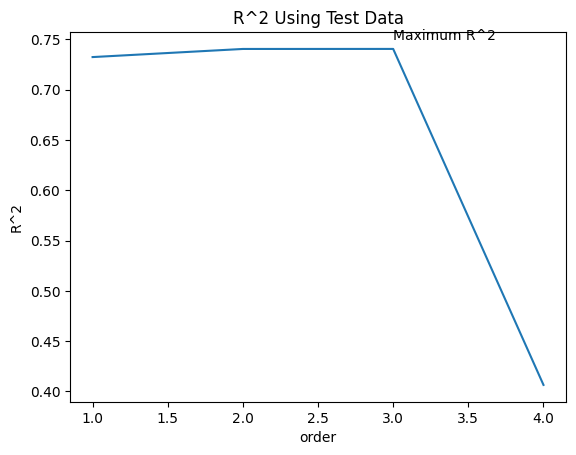

In [46]:
# Lets see how R2 changes on the test data for different order polynomials and then plot the results
Rsqu_test =[]
order = [1,2,3,4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    lr.fit(x_train_pr, y_train)
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ') 

In [49]:
Rsqu_test
# Here we see R2 gradually increases until polynomial 3 is used and after that gradually decreases at order 4 polynomial

[0.7325101750243117,
 0.7405858710699833,
 0.7406204232750754,
 0.40639663673377113]

In [51]:
# We are defining a new function here which will be used later on
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train['horsepower'], x_test['horsepower'], y_train, y_test, poly,pr)

# The following interface allows you to experiment with different polynomial orders and different amounts of data
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

In [52]:
# We can perform polynomial transformations with more than one feature.
pr1 = PolynomialFeatures(degree=2)
pr1

PolynomialFeatures()

In [53]:
# Transforming the training and testing samples for the features horsepower, curb-weight, engine-size and highwau-mpg
x_train_pr1=pr1.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

x_test_pr1=pr1.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

In [54]:
# how many dimension does the new feature have?
print(x_train_pr1.shape)
print(x_test_pr1.shape)

(110, 15)
(91, 15)


In [56]:
# creating a linear regression object poly1 and then train it using polynomial features
poly1 = LinearRegression()
poly1.fit(x_train_pr1,y_train)

LinearRegression()

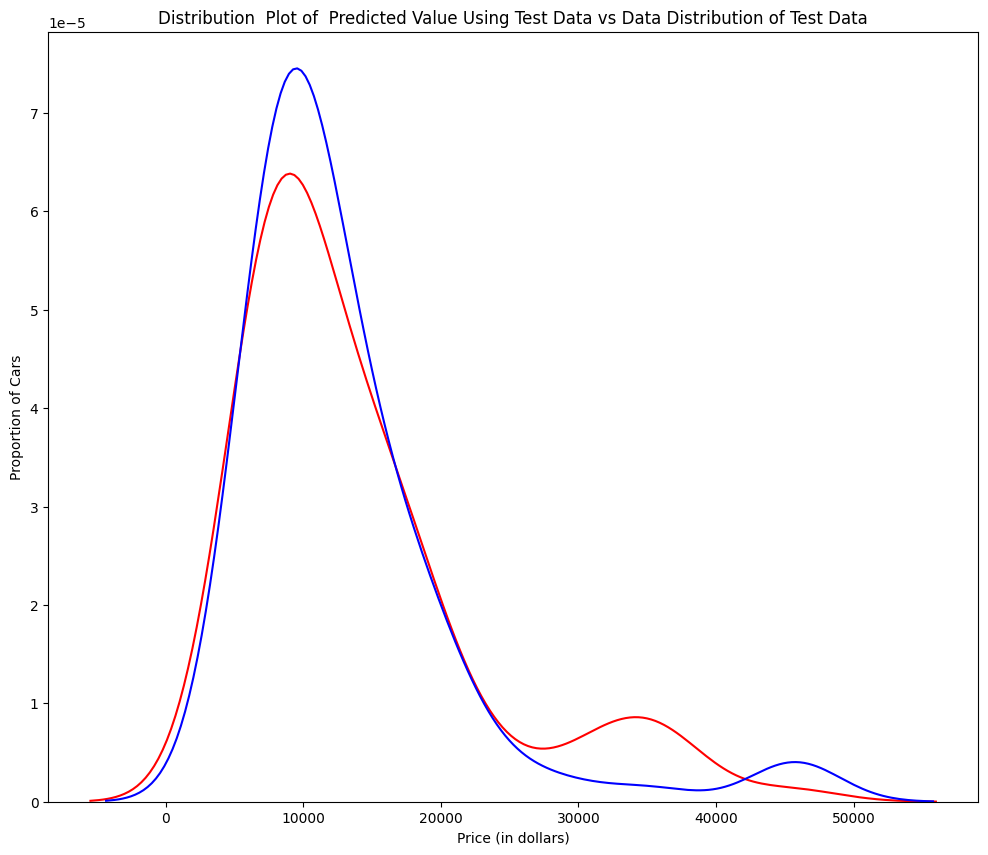

In [60]:
# Use the method predict to predict the outcome on polynomial features 
# Then use the function Distribution plot to display the predicted test vs actual test data
yhat_test1 = poly1.predict(x_test_pr1)
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test, yhat_test1, "Actual Values (Test)", "Predicted Values (Test)", Title)


RIDGE REGRESSION  
Now we will be using Ridge Regression and see how parameter alpha changes the model.  
Here test data will be used for validation

In [61]:
# Lets perform 3 degree transformation on our data
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [63]:
from sklearn.linear_model import Ridge
# creating Ridge regression object, setting regulization object to alpha(0.1)
RigeModel = Ridge(alpha=1)
RigeModel

Ridge(alpha=1)

In [64]:
RigeModel.fit(x_train_pr, y_train)

Ridge(alpha=1)

In [68]:
yhat = RigeModel.predict(x_test_pr)
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 6570.82441941  9636.2489147  20949.92322737 19403.60313256]
test set : [ 6295. 10698. 13860. 13499.]


We select the value of alpha which minimizes the test error. To do so we use the for loop. We also created a progress bar to indicate how many iterations we have done so far

In [69]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|████████████████████████████████████████| 1000/1000 [00:02<00:00, 396.55it/s, Test Score=0.564, Train Score=0.859]


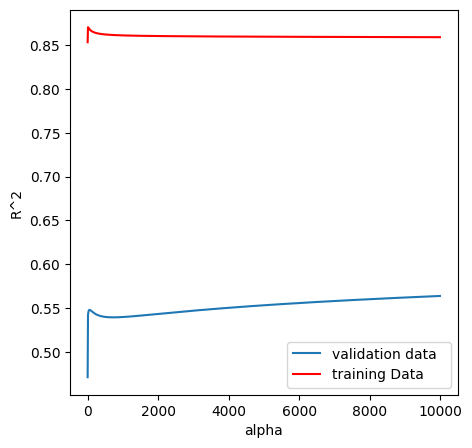

In [76]:
# We can plot value of R2 for different alphas
width = 5
height = 5
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

QUESTION  
Perform Ridge regression.  
Calculate R2 using polynomial features.  
Use training data to train the model.  
Use testing data to test the model.  
The parameter alpha should be set to 10.

In [78]:
# creating a Ridge regression object
Rm = Ridge(alpha=10)
Rm

Ridge(alpha=10)

In [79]:
RigeModel.fit(x_train_pr, y_train)
RigeModel.score(x_test_pr, y_test)

0.5637701868993107

GRID SEARCH  
The term alpha is a hyper parameter. Sklearn has a class GridSearchCV to make the process of finding hyperparamter easy

In [80]:
from sklearn.model_selection import GridSearchCV

In [81]:
# we create dictionary of parameter values
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [82]:
RR=Ridge()
RR

Ridge()

In [83]:
# create a Ridge grid search object 
Grid1 = GridSearchCV(RR, parameters1,cv=4)

In [84]:
# Fit the model
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [85]:
# The object finds the best parameter values on validation data. 
# We can obtain the estimator with best parameters and assign it to variable BestRR as follows:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

In [86]:
# Now we test our model on test data
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8411649831036151

In [ ]:
# QUESTION Perform a grid search for alpha parameter and the normalization parameter, find the best values of the parameter


In [87]:
parameters2 = [{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

Grid2 = GridSearchCV(Ridge(), parameters2, cv=4)
Grid2.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)
best_alpha = Grid2.best_params_['alpha']
best_ridge_model = Ridge(alpha=best_alpha)
best_ridge_model.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

Ridge(alpha=10000)